# Metadata 

```yaml
Course:    DS 5001 
Module:    10 Lab
Topic:     Import General Inquirer Sentiment Lexicon
Author:    R.C. Alvarado
Date:      02 April 2023 (revised)
```

**Purpose:**
* Convert [General Inquirer lexicon](http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm) into usable form. 
* Download [the spreadsheet](http://www.wjh.harvard.edu/~inquirer/inquirerbasic.xls).
* May have to install `xlrd` 

# Setting Up

In [2]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.__version__

'1.3.2'

# Import GI Excel file 

It has 182 ontology/sentiment columns

In [3]:
df = pd.read_excel(f'{data_home}/lexicons/sources/inquirerbasic.xls', false_values=None)

In [4]:
df.sample(10)

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined
805,AUSTRIAN,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif POLIT ECON PLACE,NaN
2830,DESERT#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,| 17% noun: Punishment or reward as 'just dese...
4792,GULLIBLE,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,|
6873,NEAR#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TimeSpc,NaN,PREP,| 59% prep: Close to
707,ASSEMBLE,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
10394,TELEGRAPH#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FormLw,Noun,|
2069,COMPRESS#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
2003,COMMUNICATIVE,H4Lvd,Positiv,NaN,Pstv,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FormLw,Modif,|
4321,FOUND#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,Strong,Power,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,"| 3% verb: To establish, set up--'found a coll..."
2346,CORPORATE,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,|


Check out all the columns ...

In [5]:
print(' '.join(df.columns))

Entry Source Positiv Negativ Pstv Affil Ngtv Hostile Strong Power Weak Submit Active Passive Pleasur Pain Feel Arousal EMOT Virtue Vice Ovrst Undrst Academ Doctrin Econ@ Exch ECON Exprsv Legal Milit Polit@ POLIT Relig Role COLL Work Ritual SocRel Race Kin@ MALE Female Nonadlt HU ANI PLACE Social Region Route Aquatic Land Sky Object Tool Food Vehicle BldgPt ComnObj NatObj BodyPt ComForm COM Say Need Goal Try Means Persist Complet Fail NatrPro Begin Vary Increas Decreas Finish Stay Rise Exert Fetch Travel Fall Think Know Causal Ought Perceiv Compare Eval@ EVAL Solve Abs@ ABS Quality Quan NUMB ORD CARD FREQ DIST Time@ TIME Space POS DIM Rel COLOR Self Our You Name Yes No Negate Intrj IAV DAV SV IPadj IndAdj PowGain PowLoss PowEnds PowAren PowCon PowCoop PowAuPt PowPt PowDoct PowAuth PowOth PowTot RcEthic RcRelig RcGain RcLoss RcEnds RcTot RspGain RspLoss RspOth RspTot AffGain AffLoss AffPt AffOth AffTot WltPt WltTran WltOth WltTot WlbGain WlbLoss WlbPhys WlbPsyc WlbPt WlbTot EnlGain EnlLo

See [data dictionary](https://inquirer.sites.fas.harvard.edu/homecat.htm).

# Handle variant terms 

Split entries like `FASCINATE#1` and `FASCINATE#2` with `FASCINATE, 1` and `FASCINATE, 2` (so our data are atomic).

In [6]:
df['split'] = df.Entry.str.split(r'[#_]+')

In [7]:
df

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined,split
0,A,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET ART,| article: Indefinite singular article--some o...,[A]
1,ABANDON,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|,[ABANDON]
2,ABANDONMENT,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,[ABANDONMENT]
3,ABATE,H4Lvd,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|,[ABATE]
4,ABATEMENT,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,NaN,[ABATEMENT]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11783,ZENITH,H4,Positiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,[ZENITH]
11784,ZERO,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET,|,[ZERO]
11785,ZEST,H4,Positiv,NaN,NaN,NaN,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,[ZEST]
11786,ZINC,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,[ZINC]


In [8]:
# Function to add 1 to terms without variants
def add_1(x):
    try:
        if len(x) == 1:
            x = x + ['1']
    except:
        print(x)
        x = 0
    return x

In [9]:
df['split'] = df['split'].apply(add_1)
df['term_str'] = df['split'].apply(lambda x: x[0].lower())
df['term_var'] = df['split'].apply(lambda x: x[1])
df = df.set_index(['term_str', 'term_var']).sort_index()

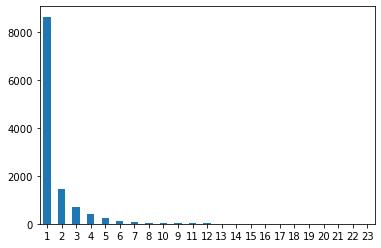

In [10]:
df.reset_index().term_var.value_counts().plot.bar(rot=0);

In [11]:
df.sample(10)

,,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined,split
term_str,term_var,,,,,,,,,,,,,,,,,,,,,
chad,1,CHAD,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun POLIT ECON PLACE,NaN,"[CHAD, 1]"
desirous,1,DESIROUS,H4,Positiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,|,"[DESIROUS, 1]"
simple,2,SIMPLE#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,"| 1% adj: ""Simpler"" - comparative of sense 1","[SIMPLE, 2]"
head,4,HEAD#4,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,TimeSpc,NaN,SUPV,| 2% verb: To set out for or be going toward--...,"[HEAD, 4]"
slam,1,SLAM,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,Hostile,Strong,NaN,...,NegAff,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|,"[SLAM, 1]"
western,1,WESTERN,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,TimeSpc,NaN,Modif,"| adj: In, of, from or toward the west","[WESTERN, 1]"
known,1,KNOWN#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV ED,| 82% verb: Past participle of 'know' sense 1,"[KNOWN, 1]"
pay,2,PAY#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,"| 4% noun-adj: Remuneration, return","[PAY, 2]"
win,3,WIN#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,Strong,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,"| 5% noun: ""Winnings"" - profit, usually from g...","[WIN, 3]"


In [12]:
df.sort_values('term_var', ascending=False).head(10)

,,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined,split
term_str,term_var,,,,,,,,,,,,,,,,,,,,,
get,9,GET#9,H4,NaN,NaN,NaN,Affil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Handels,"| 3% idiom-verb: ""Get along""--co-exist or exis...","[GET, 9]"
bear,9,BEAR#9,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,"| 1% idiom-noun: ""Teddy bear""","[BEAR, 9]"
as,9,AS#9,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Handels,| 0% idiom-adv: 'as a matter of fact'--handled...,"[AS, 9]"
round,9,ROUND#9,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,"| 0% verb: To make a circuit of, to turn","[ROUND, 9]"
run,9,RUN#9,H4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,| 1% noun-adj: An occasion or instance of runn...,"[RUN, 9]"
new,9,NEW#9,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Handels,"| 1% idiom-noun: ""New deal""--handled by ""deal""","[NEW, 9]"
mind,9,MIND#9,H4,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,"| 0% idiom-verb: ""Lose (one's) mind""--lose one...","[MIND, 9]"
way,9,WAY#9,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONJ CONJ2,"| 0% conj: 'in the way of'--as, as regards","[WAY, 9]"
look,9,LOOK#9,H4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,"| 1% verb-idiom: ""Look upon""--to regard or con...","[LOOK, 9]"


# Convert column values to numbers

In [13]:
try:
    df['polarity'] = None
    df.loc[df.Positiv == 'Positiv', 'polarity'] = 1
    df.loc[df.Negativ == 'Negativ', 'polarity'] = -1
    df['polarity'] = df['polarity'].fillna(0).astype(int)
except TypeError as e:
    print(e, "--  This means you are re-running the script with values that have already been set.")

In [14]:
df.polarity.sample(10)

term_str       term_var
steel          1           0
new            3           0
communal       1           1
exploit        1           0
jail           1          -1
declaration    1           0
newspaper      1           0
correspondent  1           0
hysterical     1          -1
fix            5          -1
Name: polarity, dtype: int64

In [15]:
VALCOLS = df.columns[2:-4]

In [16]:
df[VALCOLS] = df[VALCOLS].fillna(0).astype('bool').astype('int')

In [17]:
df.loc['love', VALCOLS]#.stack().sort_values(ascending=False)

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
term_var,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# df.loc['love', (].T.style.background_gradient()

# Take and combine only sentiment 

In [19]:
sents = df.query("Positiv > 0 | Negativ > 0").copy()

In [20]:
sents['sentiment'] = sents.Positiv - sents.Negativ

In [29]:
sents[['sentiment']].sample(5)

,,sentiment
term_str,term_var,
responsible,1,1
demon,1,-1
genius,1,1
diabolic,1,-1
vehement,1,-1


## Take average of variants

In [22]:
GI = sents.groupby('term_str').sentiment.mean()

## Snap values to -1, 0, or 1

In [23]:
GI = np.sign(GI).astype('int').to_frame()

In [24]:
GI.shape

(3626, 1)

In [25]:
GI.sample(10)

,sentiment
term_str,
lonely,-1
cheapen,-1
futility,-1
disguise,-1
extinct,-1
indispensable,1
wearisome,-1
famine,-1
rally,1


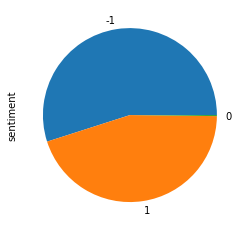

In [26]:
GI.sentiment.value_counts().plot.pie();

# Save

In [27]:
GI.to_csv(data_home + '/lexicons/sources/gi.csv')